In [1]:
'''This script demonstrates how to entangle digit with fashion mnist
'''
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from keras.layers import Input, Dense, Lambda, Flatten, Reshape, Layer
from keras.layers import Conv2D, Conv2DTranspose
from keras.models import Model
from keras import backend as K
from keras import metrics
import keras
sys.path.append(os.path.expanduser('~/notebook'))
from tools import plot_confusion_matrix, plot_model, layers, nb_tools, viz, loader, build_model, sanity, sampling, custom_variational_layer, metrics, build_model

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

# input image dimensions
img_rows, img_cols, img_chns = 28, 28, 1
if K.image_data_format() == 'channels_first':
    original_img_size = (img_chns, img_rows, img_cols)
else:
    original_img_size = (img_rows, img_cols, img_chns)
# number of convolutional filters to use
filters = 64
# convolution kernel size
num_conv = 3
# batch size
batch_size = 128
# latent dim
latent_dim = 2

# Hyperparameters
# Beta
beta = 4.0
# label set
label = 5
# use fashion mnist or not (digit)
use_fashion = 0
# epochs
epochs = 150

try:
    _beta = np.float(os.environ['BETA'])
    _label = np.int(os.environ['LABEL'])
    _epochs = np.int(os.environ['EPOCHS'])
    _use_fashion = np.int(os.environ['USE_FASHION'])
    _latent_dim = np.int(os.environ['DIM_LATENT'])
    latent_dim = _latent_dim
    beta = _beta
    label = _label
    epochs = _epochs
    use_fashion = _use_fashion
    print("WARNING: Set parameters from environment")
except:
    pass

prefix = "eMNSIT_fashion-" + str(use_fashion) + "_label-" + str(label) + "_latent_dim-" + str(latent_dim) + "_beta-" + str(beta) + "_epochs-" + str(epochs)


model_obj = build_model.Vae2dConv()
model_obj.configure(img_rows = img_rows, img_cols = img_cols, img_chns = img_chns,
                    batch_size = batch_size, filters = 64, num_conv = 3,
                    intermediate_dim = 128,
                    latent_dim = latent_dim,
                    beta = beta)

vae = model_obj.get_model()
vae.compile(optimizer='rmsprop', loss=None)
# vae.summary()
# SVG(model_to_dot(vae).create(prog='dot', format='svg'))

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:75: UserWarning: Output "vae_loss_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "vae_loss_1" during training.


In [2]:
# train the VAE on MNIST digits
if use_fashion==1:
    x_train, y_train, x_test, y_test = loader.mnist(new_shape = original_img_size, kind='fashion', get_single_label = label)
else:
    x_train, y_train, x_test, y_test = loader.mnist(new_shape = original_img_size, kind='digit', get_single_label = label)

#print('x_train.shape:', x_train.shape)
#print('min value:', np.amin(x_train))
#print('max value:', np.amax(x_train))
#print('mean:', np.mean(x_train))
#print('variance:', np.var(x_train))


In [3]:
# train
# Workaround for beta == 4.0
#if label == 5 and use_fashion == 0:
#    print("asdasd")
#    _x_train, _y_train, _x_test, _y_test = loader.mnist(new_shape = original_img_size, kind='digit', get_single_label = 6)
#    vae.fit(_x_train, shuffle=True, epochs=epochs, batch_size=batch_size, validation_data=(_x_test, None))

vae.fit(x_train, shuffle=True, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))

model_obj.store_model(prefix + "_model-decoder", model_obj.get_decoder(), overwrite = True)
model_obj.store_model(prefix + "_model-encoder-logvar", model_obj.get_encoder_logvar(), overwrite = True)
model_obj.store_model(prefix + "_model-encoder-mean", model_obj.get_encoder_mean(), overwrite = True)

Train on 5421 samples, validate on 892 samples
Epoch 1/150
5421/5421 [==============================] - 4s 675us/step - loss: 240.8565 - val_loss: 194.9781
Epoch 2/150
5421/5421 [==============================] - 1s 152us/step - loss: 184.9505 - val_loss: 175.1931
Epoch 3/150
5421/5421 [==============================] - 1s 153us/step - loss: 172.2698 - val_loss: 168.0527
Epoch 4/150
5421/5421 [==============================] - 1s 151us/step - loss: 164.9613 - val_loss: 168.8148
Epoch 5/150
5421/5421 [==============================] - 1s 153us/step - loss: 161.8998 - val_loss: 159.3309
Epoch 6/150
5421/5421 [==============================] - 1s 153us/step - loss: 159.6725 - val_loss: 156.2799
Epoch 7/150
5421/5421 [==============================] - 1s 154us/step - loss: 157.4943 - val_loss: 165.9933
Epoch 8/150
5421/5421 [==============================] - 1s 151us/step - loss: 156.2379 - val_loss: 158.2372
Epoch 9/150
5421/5421 [==============================] - 1s 152us/step - loss: 15

5421/5421 [==============================] - 1s 154us/step - loss: 142.1203 - val_loss: 150.5941
Epoch 76/150
5421/5421 [==============================] - 1s 151us/step - loss: 142.2443 - val_loss: 151.2978
Epoch 77/150
5421/5421 [==============================] - 1s 152us/step - loss: 142.0082 - val_loss: 150.6864
Epoch 78/150
5421/5421 [==============================] - 1s 152us/step - loss: 142.0902 - val_loss: 150.9681
Epoch 79/150
5421/5421 [==============================] - 1s 154us/step - loss: 141.8308 - val_loss: 149.8370
Epoch 80/150
5421/5421 [==============================] - 1s 153us/step - loss: 141.9414 - val_loss: 151.7765
Epoch 81/150
5421/5421 [==============================] - 1s 151us/step - loss: 141.8972 - val_loss: 151.2927
Epoch 82/150
5421/5421 [==============================] - 1s 151us/step - loss: 141.7907 - val_loss: 151.3951
Epoch 83/150
5421/5421 [==============================] - 1s 151us/step - loss: 141.6077 - val_loss: 151.5188
Epoch 84/150
5421/5421 

5421/5421 [==============================] - 1s 152us/step - loss: 138.0379 - val_loss: 156.7911
Epoch 150/150
5421/5421 [==============================] - 1s 151us/step - loss: 138.0417 - val_loss: 154.2397
Saved model to disk
Saved weights to disk
Saved model to disk
Saved weights to disk
Saved model to disk
Saved weights to disk


save to:  eMNSIT_fashion-0_label-5_latent_dim-2_beta-4.0_epochs-150_z.png


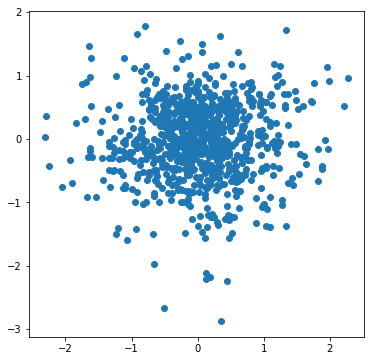

save to:  eMNSIT_fashion-0_label-5_latent_dim-2_beta-4.0_epochs-150_x.png


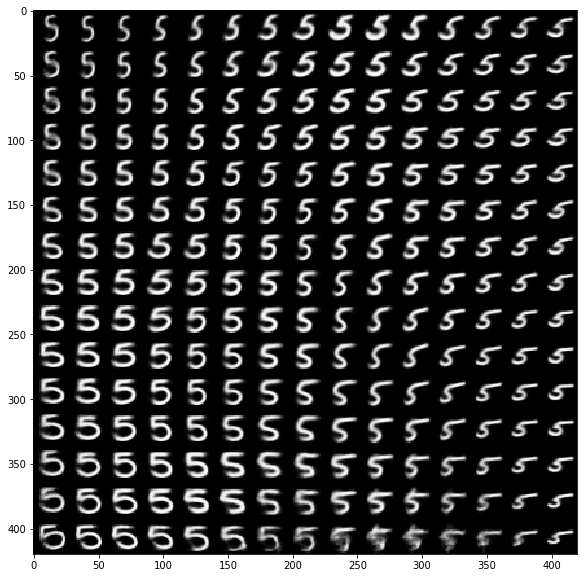

save to:  eMNSIT_fashion-0_label-5_latent_dim-2_beta-4.0_epochs-150_z_statistics.png


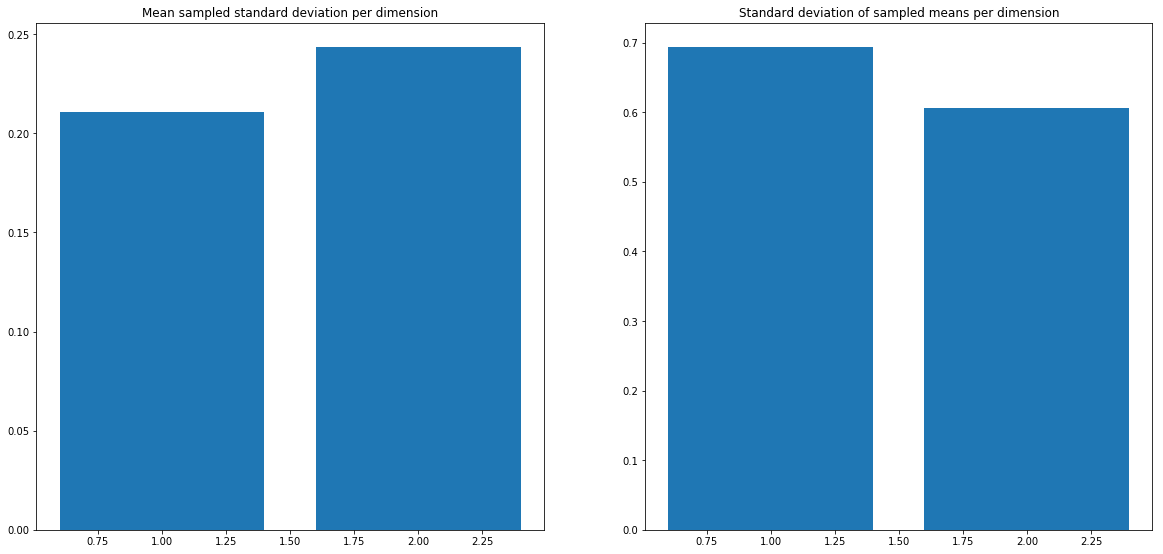

In [4]:
# build a model to project inputs on the latent space
encoder_mean = model_obj.get_encoder_mean()
encoder_log_var = model_obj.get_encoder_logvar()
x_encoded = encoder_mean.predict(x_test, batch_size=batch_size)
x_encoded_std = np.exp(encoder_log_var.predict(x_train, batch_size=batch_size) / 2.0)

if latent_dim == 2:
    # display a 2D plot of the digit classes in the latent space
    plt.figure(figsize=(6, 6))
    plt.scatter(x_encoded[:, 0], x_encoded[:, 1])
    # plt.colorbar()
    save_str = prefix + "_z" + ".png"
    plt.savefig(save_str, dpi=300)
    print("save to: ", save_str)
    plt.show(block=False)

    # build a digit generator that can sample from the learned distribution
    generator = model_obj.get_decoder()

    # display a 2D manifold of the digits
    n = 15  # figure with 15x15 digits
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
    # to produce values of the latent variables z, since the prior of the latent space is Gaussian
    grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
    grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

    for i, yi in enumerate(grid_x):
        for j, xi in enumerate(grid_y):
            z_sample = np.array([[xi, yi]])
            z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
            x_decoded = generator.predict(z_sample, batch_size=batch_size)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    plt.imshow(figure, cmap='Greys_r')
    save_str = prefix + "_x" + ".png"
    plt.savefig(save_str, dpi=300)
    print("save to: ", save_str)
    plt.show(block=False)


# get statistics per dimension
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
x_encoded_std_mean = np.mean(x_encoded_std, axis=0)
x_std_encoded = np.std(x_encoded, axis=0)
ax[0].bar(np.arange(1,latent_dim + 1), x_encoded_std_mean, width=0.8)
ax[0].set_title("Mean sampled standard deviation per dimension")
ax[1].bar(np.arange(1,latent_dim + 1), x_std_encoded, width=0.8)
ax[1].set_title("Standard deviation of sampled means per dimension")
asp = np.diff(ax[0].get_xlim())[0] / np.diff(ax[0].get_ylim())[0]
ax[0].set_aspect(asp)
asp = np.diff(ax[1].get_xlim())[0] / np.diff(ax[1].get_ylim())[0]
ax[1].set_aspect(asp)
save_str = prefix + "_z_statistics" + ".png"
plt.savefig(save_str, dpi=300)
print("save to: ", save_str)
plt.show(block=False)

In [5]:
#from scipy.stats import norm
#print(norm.ppf(np.linspace(0.05, 0.95, 3)))